# Single Transmon - Grounded (xmon) 

We'll be creating a 2D design and adding a single transmon cross (xmon) qcomponent.

Simple Metal Transmon Cross object. Creates the a cross-shaped island, the "junction" on the south end, and up to 3 connectors on the remaining arms (claw or gap).

'claw_width' and 'claw_gap' define the width/gap of the CPW line that makes up the connector. Note, DC SQUID currently represented by single inductance sheet

In [1]:
# So, let us dive right in. For convenience, let's begin by enabling
# automatic reloading of modules when they change.
%load_ext autoreload
%autoreload 2

In [2]:
import qiskit_metal as metal
from qiskit_metal import designs, draw
from qiskit_metal import MetalGUI, Dict, open_docs

In [3]:
# Each time you create a new quantum circuit design, 
# you start by instantiating a QDesign class. 

# The design class `DesignPlanar` is best for 2D circuit designs.

design = designs.DesignPlanar()

In [4]:
#Launch Qiskit Metal GUI to interactively view, edit, and simulate QDesign: Metal GUI
gui = MetalGUI(design)

### A transmon qubit
You can create a ready-made transmon cross qubit from the QComponent Library, `qiskit_metal.qlibrary.qubits`. 
`transmon_cross.py` is the file containing our qubit so `transmon_cross` is the module we import. 
The `TransmonCross` class is our transmon cross qubit. Like all quantum components, `TransmonCross` inherits from `QComponent`. 

 Connector lines can be added using the `connection_pads` dictionary. 
 Each connector pad has a name and a list of default properties.

In [5]:
from qiskit_metal.qlibrary.qubits.transmon_cross import TransmonCross

# Be aware of the default_options that can be overridden by user.
TransmonCross.get_template_options(design)

{'pos_x': '0um',
 'pos_y': '0um',
 'connection_pads': {},
 '_default_connection_pads': {'connector_type': '0',
  'claw_length': '30um',
  'ground_spacing': '5um',
  'claw_width': '10um',
  'claw_gap': '6um',
  'connector_location': '0'},
 'cross_width': '20um',
 'cross_length': '200um',
 'cross_gap': '20um',
 'orientation': '0',
 'hfss_inductance': '10nH',
 'hfss_capacitance': 0,
 'hfss_resistance': 0,
 'hfss_mesh_kw_jj': 7e-06,
 'q3d_inductance': '10nH',
 'q3d_capacitance': 0,
 'q3d_resistance': 0,
 'q3d_mesh_kw_jj': 7e-06,
 'gds_cell_name': 'my_other_junction'}

In [6]:


# The connectord_type can be string of '0' for 'Claw' or '1' for 'Gap' 
# to define which type of connector is used.

# The connector_location can be string of '0', '90', '180'  degrees which of the three arms where a given connector should be.
# South is for the junction. 

xmon_options = dict(
    connection_pads=dict(
        a = dict( connector_location = '0', connector_type = '0'), 
        b = dict(connector_location = '90', connector_type = '0'),
        c = dict(connector_location = '180', connector_type = '1'),
    ),
)

# Create a new Transmon Cross object with name 'Q1' 
q1 = TransmonCross(design, 'Q1', options=xmon_options)

gui.rebuild()  # rebuild the design and plot 
gui.autoscale() #resize GUI to see QComponent
gui.zoom_on_components(['Q1']) #Can also gui.zoom_on_components([q1.name])

In [7]:
# Let's see what the Q1 object looks like
q1 #print Q1 information

name:    Q1
class:   TransmonCross         
options: 
  'pos_x'             : '0um',                        
  'pos_y'             : '0um',                        
  'connection_pads'   : {
       'a'                 : {
            'connector_type'    : '0',                          
            'claw_length'       : '30um',                       
            'ground_spacing'    : '5um',                        
            'claw_width'        : '10um',                       
            'claw_gap'          : '6um',                        
            'connector_location': '0',                          
                             },
       'b'                 : {
            'connector_type'    : '0',                          
            'claw_length'       : '30um',                       
            'ground_spacing'    : '5um',                        
            'claw_width'        : '10um',                       
            'claw_gap'          : '6um',                        
 

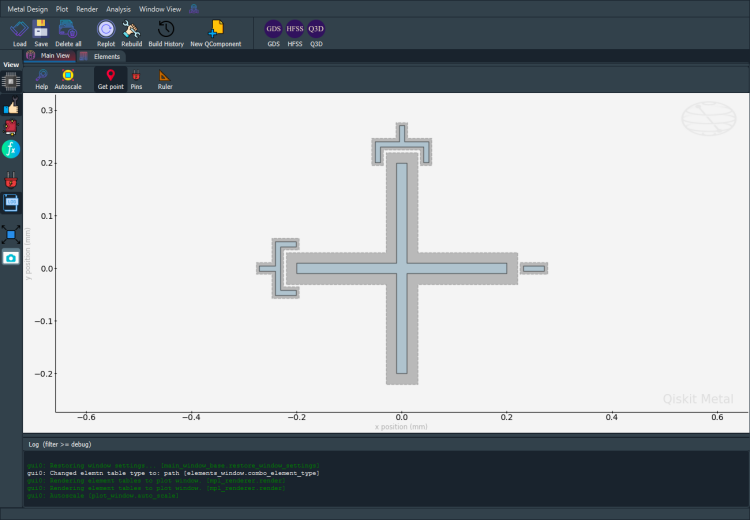

In [8]:
# Save screenshot as a .png formatted file.

gui.screenshot()

## Closing the Qiskit Metal GUI

In [9]:
gui.main_window.close()

True